<a href="https://colab.research.google.com/github/yahyaouichaiima/NLP./blob/main/TF_IDF_TP_Exemple_et_Analyse_Sentiment_Yahyaouichaima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des librairies

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Partie 1 Exemple d'application de TF-IDF

In [ ]:
corpus = [
    '2 cups of flour',
    'replace the flour',
    'replace the keyboard in 2 minutes',
    'do you prefer Windows or Mac',
    'the Mac has the most noisy keyboard',
]

In [ ]:
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [ ]:
# apply the vectorizer to the corpus
X1 = vectorizer.fit_transform(corpus)

In [ ]:
# display the document-term matrix
vocab = vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X1.todense(), columns=vocab)

In [ ]:
docterm

,cups,do,flour,has,in,keyboard,mac,minutes,most,noisy,of,or,prefer,replace,the,windows,you
0,0.614189,0.000000,0.495524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.614189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.609818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609818,0.506204,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.516374,0.416607,0.000000,0.516374,0.000000,0.000000,0.000000,0.000000,0.000000,0.416607,0.345822,0.000000,0.000000
3,0.000000,0.420669,0.000000,0.000000,0.000000,0.000000,0.339393,0.000000,0.000000,0.000000,0.000000,0.420669,0.420669,0.000000,0.000000,0.420669,0.420669
4,0.000000,0.000000,0.000000,0.405025,0.000000,0.326771,0.326771,0.000000,0.405025,0.405025,0.000000,0.000000,0.000000,0.000000,0.542500,0.000000,0.000000


Partie 2 Sentiment Analysis avec TF-IDF

Librairies de vectorisation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

Importation de données

In [ ]:
df=pd.read_csv("/content/IMDB Dataset.csv")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

In [ ]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

Afficher le 10 ième review

Réaliser une tokenisation de 10 ième review avec word_tokenize

In [ ]:
from nltk import word_tokenize



# WordCloud

In [ ]:
ex = df['review'][0]

In [ ]:
cloud_word = WordCloud().generate(ex)

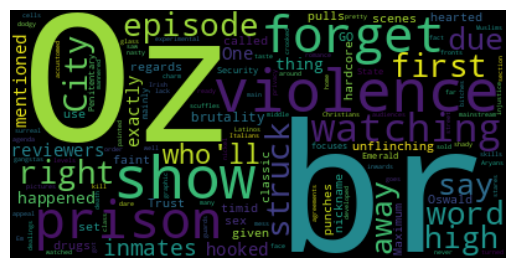

In [ ]:
plt.imshow(cloud_word, interpolation='bilinear')
plt.axis('off')
plt.show()

Afficher le cloud word de review 3

In [ ]:
ex1 = df['review'][2]


In [ ]:
cloud_word = WordCloud().generate(ex1)

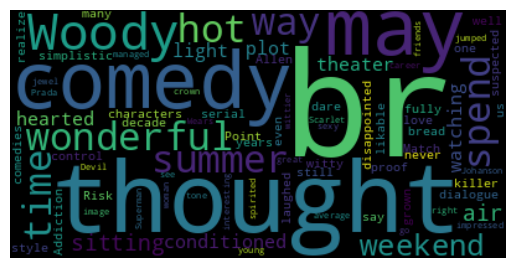

In [ ]:
plt.imshow(cloud_word, interpolation='bilinear')
plt.axis('off')
plt.show()

# Nettoyage du texte :
- Effacer html tags
- Effacer les caractères spéciaux
- Convertir les mots to lower case
- Effacer les stopwords
- Stemming

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Supprimer les caractères spéciaux

In [ ]:
def clean_speciaux(text):
    clean=re.compile('<.*?>')
    return re.sub(clean,'',text)

In [ ]:
def clean_http(text):
    clean=re.compile('http\S+')
    return re.sub(clean,'',text)

In [ ]:
df['review']=df['review'].apply(clean_http)

In [ ]:
df['review']=df['review'].apply(clean_speciaux)

Définir une fonction pour supprimer les @ et #

In [ ]:
def clean_aro(text):
    clean=re.compile('@')
    return re.sub(clean,'',text)

In [ ]:
def clean_aro(text):
    clean=re.compile('#')
    return re.sub(clean,'',text)

In [ ]:
df['review'] = df['review'].apply(clean_aro)

Convertir text to lowercase

In [ ]:
lowercase_text = text.lower()
print(lowercase_text)


if you like original gut wrenching laughter you will like this movie. if you are young or old then you will love this movie, hell even my mom liked it.great camp!!!


Supprimer les stopwords

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


conversion en labels :

In [ ]:
df['sentiment'].replace({'positive':1,'negative':0},inplace=True)

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


# Distribution des sentiments

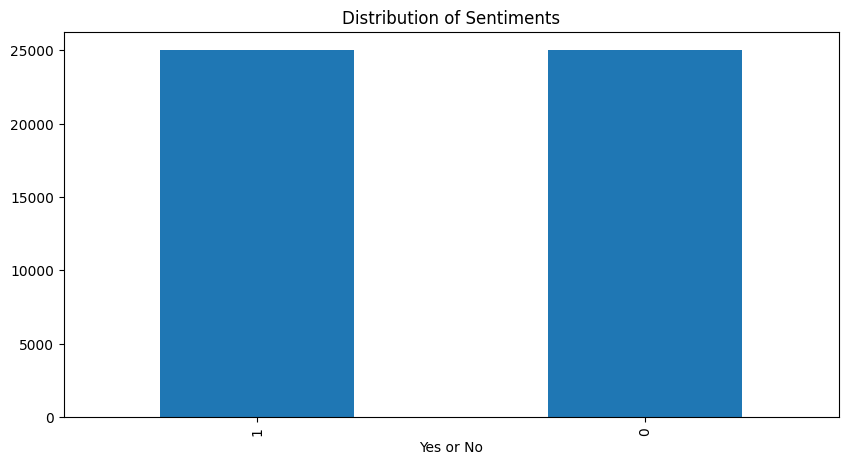

In [ ]:
ax=df['sentiment'].value_counts().plot(kind='bar',title='Distribution of Sentiments',figsize=(10, 5))
ax.set_xlabel('Yes or No')
plt.show()

TF-IDF vectorizer

In [ ]:
cv = TfidfVectorizer(max_features=5000)
X = cv.fit_transform(df['review']).toarray()
y = df['sentiment']


split data : Train, test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train

array([[0.        , 0.05227072, 0.02757107, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08249721, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Apprentissage Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial')

model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

Prediction de data test

In [ ]:
result = model.predict(X_test)

In [ ]:
result

array([0, 1, 0, ..., 1, 1, 1])

score

In [ ]:
print(model.score(X_test, y_test))

0.8947272727272727


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_logistic = confusion_matrix(y_test, result, labels=[1,0])
confusion_matrix_logistic

array([[7502,  790],
       [ 947, 7261]])

Text(0.5, 1.0, 'Confusion matrix logistic regression')

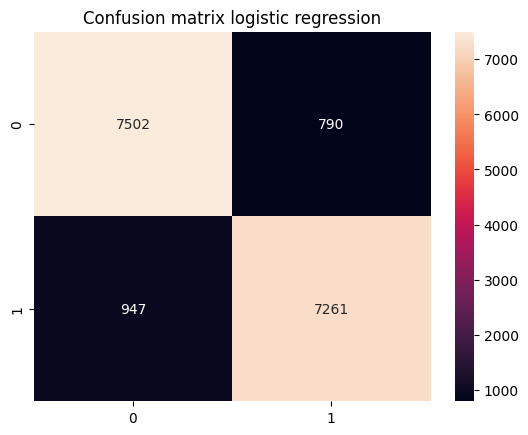

In [ ]:
import seaborn as sns
ax = plt.axes()
sns.heatmap(confusion_matrix_logistic, annot=True, fmt="d")
ax.set_title('Confusion matrix logistic regression')

# Travail à faire : choisir un autre classificateur  (Naive Bayes, Random forest) et reprendre l'apprentissage du model jusqu'à la matrice de confusion

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
X = df.drop('review', axis=1)
y = df['sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [ ]:
clf = svm.SVC(kernel='rbf')



In [ ]:
clf.fit(X_train, y_train).score(X_test, y_test)

1.0

In [ ]:
y_pred = clf.predict(X_test)

Test réel 16477    0
5969     1
46459    1
33297    0
35047    0
        ..
11718    1
3913     1
25838    1
38396    1
48283    0
Name: sentiment, Length: 10000, dtype: int64
Test prédit [0 1 1 ... 1 1 0]
[[5036    0]
 [   0 4964]]


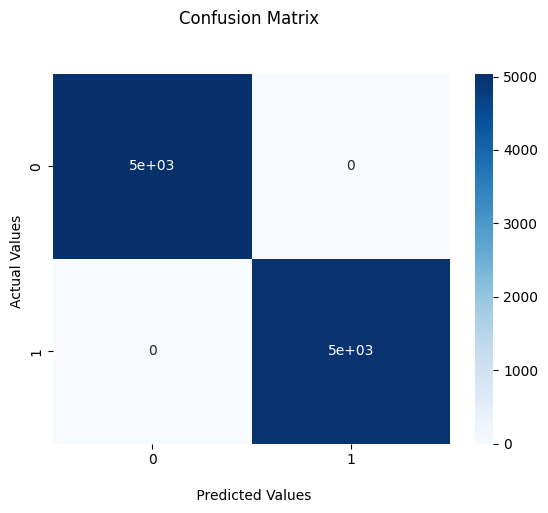

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Test réel", y_test)
print ("Test prédit",y_pred)
print (cm)
tn, fp, fn, tp = cm.ravel()
ax=sns.heatmap(cm, annot=True,cmap='Blues')
ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\n Predicted Values')
ax.set_ylabel('Actual Values ');